In [1]:
# Programming Assignment 3

In [4]:
#getting groceries data ready
#import required libraries 


import os
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import warnings 
warnings.filterwarnings("ignore")

groceries = [row.dropna().tolist() for index, row in pd.read_csv(r'Grocery_Items_19.csv').iterrows()]
te = TransactionEncoder()
te_ary = te.fit(groceries).transform(groceries)
groceries = pd.DataFrame(te_ary, columns=te.columns_)
groceries.head(2)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#with minimum support = 0.01 and minimum confidence threshold = 0.1
frequent_items = apriori(groceries, min_support=0.01, use_colnames=True)
association_rules(frequent_items, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rolls/buns),(other vegetables),0.114875,0.124375,0.011500,0.100109,0.804895,-0.002788,0.973034
1,(soda),(other vegetables),0.097250,0.124375,0.010125,0.104113,0.837090,-0.001970,0.977383
2,(other vegetables),(whole milk),0.124375,0.156125,0.016125,0.129648,0.830413,-0.003293,0.969579
3,(whole milk),(other vegetables),0.156125,0.124375,0.016125,0.103283,0.830413,-0.003293,0.976478
4,(rolls/buns),(whole milk),0.114875,0.156125,0.015250,0.132753,0.850299,-0.002685,0.973050
5,(soda),(whole milk),0.097250,0.156125,0.012750,0.131105,0.839746,-0.002433,0.971205
6,(yogurt),(whole milk),0.086000,0.156125,0.010750,0.125000,0.800641,-0.002677,0.964429


<AxesSubplot:xlabel='support', ylabel='conf'>

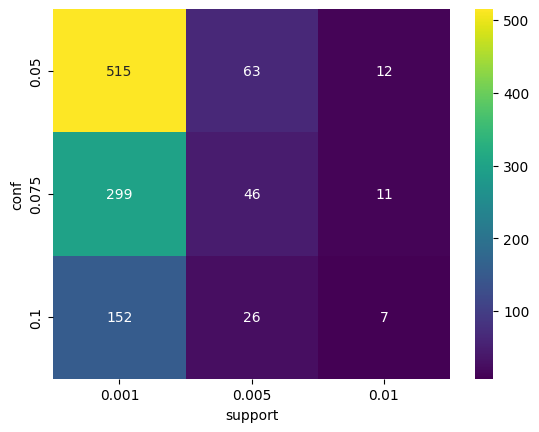

In [9]:
#Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct): 0.05, 0.075, 0.1.
#import required libARIES
import seaborn as sns

support =[ 0.001, 0.005, 0.01] 
conf =[ 0.05, 0.075, 0.1]

countdf = pd.DataFrame(columns=['support', 'conf', 'count'])
for i in support:
    for j in conf:
        countdf = countdf.append({'support': i, 'conf': j, 'count': len(association_rules(apriori(groceries,min_support=i,use_colnames=True),metric="confidence", min_threshold=j))}, ignore_index=True)
sns.heatmap(countdf.pivot("conf", "support", "count"),annot=True,fmt="0.0f",cmap='viridis')

In [11]:
### Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset
###for minimum support = 0.005 and minimum confident threshold = 0.075. Show the associationrules for both sets. 
###Which association rules appeared in both sets (note that there could be none)?

subset1 = groceries.iloc[:len(groceries)//2]
subset2 = groceries.iloc[len(groceries)//2:]

def part1e(data):
    frequent_items = apriori(data, min_support=0.005, use_colnames=True)
    rules=association_rules(frequent_items, metric="confidence", min_threshold=0.075)
    return rules

In [12]:
part1e(subset1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.03525,0.15950,0.00500,0.141844,0.889304,-0.000622,0.979426
1,(bottled beer),(whole milk),0.04300,0.15950,0.00500,0.116279,0.729022,-0.001858,0.951092
2,(bottled water),(rolls/buns),0.06425,0.11175,0.00600,0.093385,0.835662,-0.001180,0.979744
3,(bottled water),(whole milk),0.06425,0.15950,0.00725,0.112840,0.707464,-0.002998,0.947406
4,(canned beer),(rolls/buns),0.04550,0.11175,0.00600,0.131868,1.180028,0.000915,1.023174
5,(canned beer),(whole milk),0.04550,0.15950,0.00650,0.142857,0.895656,-0.000757,0.980583
6,(chicken),(rolls/buns),0.03050,0.11175,0.00500,0.163934,1.466975,0.001592,1.062417
7,(citrus fruit),(other vegetables),0.05725,0.12225,0.00525,0.091703,0.750127,-0.001749,0.966369
8,(citrus fruit),(whole milk),0.05725,0.15950,0.00825,0.144105,0.903478,-0.000881,0.982013
9,(citrus fruit),(yogurt),0.05725,0.08025,0.00575,0.100437,1.251547,0.001156,1.022441


In [13]:
part1e(subset2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(rolls/buns),0.04675,0.11800,0.00525,0.112299,0.951690,-0.000266,0.993578
1,(bottled beer),(whole milk),0.04675,0.15275,0.00725,0.155080,1.015255,0.000109,1.002758
2,(bottled water),(soda),0.05825,0.10025,0.00500,0.085837,0.856229,-0.000840,0.984234
3,(bottled water),(whole milk),0.05825,0.15275,0.00850,0.145923,0.955304,-0.000398,0.992006
4,(citrus fruit),(other vegetables),0.05375,0.12650,0.00500,0.093023,0.735362,-0.001799,0.963090
5,(citrus fruit),(rolls/buns),0.05375,0.11800,0.00600,0.111628,0.945999,-0.000342,0.992827
6,(citrus fruit),(whole milk),0.05375,0.15275,0.00625,0.116279,0.761238,-0.001960,0.958730
7,(citrus fruit),(yogurt),0.05375,0.09175,0.00575,0.106977,1.165959,0.000818,1.017051
8,(domestic eggs),(whole milk),0.03825,0.15275,0.00750,0.196078,1.283656,0.001657,1.053896
9,(frankfurter),(other vegetables),0.03500,0.12650,0.00525,0.150000,1.185771,0.000822,1.027647


In [14]:
pd.merge(part1e(subset1),part1e(subset2),on=['antecedents', 'consequents'])

,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y
0,(bottled beer),(whole milk),0.04300,0.15950,0.00500,0.116279,0.729022,-0.001858,0.951092,0.04675,0.15275,0.00725,0.155080,1.015255,0.000109,1.002758
1,(bottled water),(whole milk),0.06425,0.15950,0.00725,0.112840,0.707464,-0.002998,0.947406,0.05825,0.15275,0.00850,0.145923,0.955304,-0.000398,0.992006
2,(citrus fruit),(other vegetables),0.05725,0.12225,0.00525,0.091703,0.750127,-0.001749,0.966369,0.05375,0.12650,0.00500,0.093023,0.735362,-0.001799,0.963090
3,(citrus fruit),(whole milk),0.05725,0.15950,0.00825,0.144105,0.903478,-0.000881,0.982013,0.05375,0.15275,0.00625,0.116279,0.761238,-0.001960,0.958730
4,(citrus fruit),(yogurt),0.05725,0.08025,0.00575,0.100437,1.251547,0.001156,1.022441,0.05375,0.09175,0.00575,0.106977,1.165959,0.000818,1.017051
5,(frankfurter),(other vegetables),0.04050,0.12225,0.00500,0.123457,1.009871,0.000049,1.001377,0.03500,0.12650,0.00525,0.150000,1.185771,0.000822,1.027647
6,(newspapers),(whole milk),0.04075,0.15950,0.00575,0.141104,0.884666,-0.000750,0.978582,0.04500,0.15275,0.00650,0.144444,0.945626,-0.000374,0.990292
7,(pip fruit),(other vegetables),0.04900,0.12225,0.00550,0.112245,0.918159,-0.000490,0.988730,0.05050,0.12650,0.00500,0.099010,0.782687,-0.001388,0.969489
8,(other vegetables),(rolls/buns),0.12225,0.11175,0.01150,0.094070,0.841786,-0.002161,0.980484,0.12650,0.11800,0.01150,0.090909,0.770416,-0.003427,0.970200
9,(rolls/buns),(other vegetables),0.11175,0.12225,0.01150,0.102908,0.841786,-0.002161,0.978440,0.11800,0.12650,0.01150,0.097458,0.770416,-0.003427,0.967822


In [15]:
# Image processing
# Image classification
#import required libraries
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

## get image paths and dog breeds to build model

imagepaths=[]
dogbreeds=[]
for index, breedname in enumerate(os.listdir(r'Cropped')):
    img = os.path.join(r'Cropped', breedname)
    imgfiles = glob(os.path.join(img, '*.jpg'))
    imagepaths.extend(imgfiles)
    dogbreeds.extend([breedname] * len(imgfiles))
    
df = pd.DataFrame({'image_path': imagepaths, 'dogbreeds': dogbreeds})

training,validation = train_test_split(df, test_size=0.2, random_state=42)

training_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

training_generator = training_datagen.flow_from_dataframe(
    training,
    x_col='image_path',
    y_col='dogbreeds',
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical')
validation_generator = validation_datagen.flow_from_dataframe(
    validation,
    x_col='image_path',
    y_col='dogbreeds',
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical')


Found 565 validated image filenames belonging to 4 classes.
Found 142 validated image filenames belonging to 4 classes.


In [18]:
#banner ID :916461181

#implementing model with the given parameters

import tensorflow as tf

# Define the model
model = Sequential()

# Add convolutional layer with 8 filters
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# Add max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the tensor
model.add(Flatten())

# Add hidden layer with 16 nodes
model.add(Dense(16, activation='relu'))

# Add output layer with 4 nodes and softmax activation
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 31752)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                508048    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
Total params: 508,340
Trainable params: 508,340
Non-trainable params: 0
_________________________________________________________________


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 36 steps, validate for 9 steps
Epoch 1/10
36/36 [==============================] - 6s 175ms/step - loss: 1.4413 - accuracy: 0.3292 - val_loss: 1.3870 - val_accuracy: 0.2324
Epoch 2/10
36/36 [==============================] - 1s 39ms/step - loss: 1.3832 - accuracy: 0.3363 - val_loss: 1.3879 - val_accuracy: 0.2324
Epoch 3/10
36/36 [==============================] - 1s 39ms/step - loss: 1.3789 - accuracy: 0.3416 - val_loss: 1.3609 - val_accuracy: 0.2746
Epoch 4/10
36/36 [==============================] - 1s 38ms/step - loss: 1.3882 - accuracy: 0.3558 - val_loss: 1.3901 - val_accuracy: 0.2324
Epoch 5/10
36/36 [==============================] - 1s 39ms/step - loss: 1.3769 - accuracy: 0.3363 - val_loss: 1.3913 - val_accuracy: 0.2324
Epoch 6/10
36/36 [==============================] - 2s 44ms/step - loss: 1.3755 - accuracy: 0.3363 - val_loss: 1.3927 - val_accuracy: 0.2324
Epoch 7/10
36/36 [==============================] - 1s 38ms/st

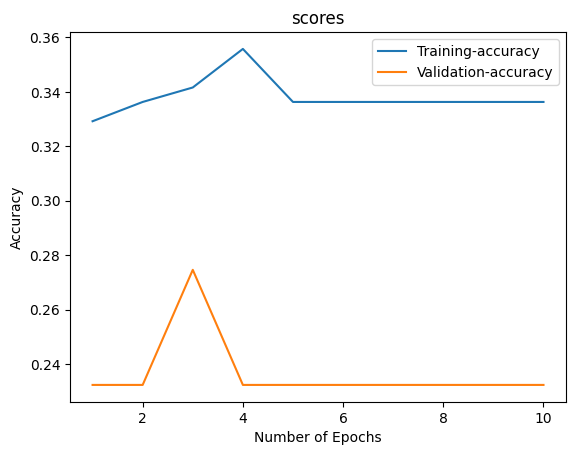

In [19]:
history = model.fit(
        training_generator,
        steps_per_epoch=len(training_generator),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator)
    )
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(train) + 1)
plt.plot(epochs, train , label='Training-accuracy')
plt.plot(epochs, val, label='Validation-accuracy')
plt.title("scores")

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
model = Sequential()

model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(128, 128, 3)))

# Add max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the tensor
model.add(Flatten())

# Add hidden layer with 16 nodes
model.add(Dense(16, activation='relu'))

# Add output layer with 4 nodes and softmax activation
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 8)       608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                492048    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 492,724
Trainable params: 492,724
Non-trainable params: 0
_________________________________________________________________


filter size 5

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 36 steps, validate for 9 steps
Epoch 1/10
36/36 [==============================] - 2s 67ms/step - loss: 1.3639 - accuracy: 0.4018 - val_loss: 0.9687 - val_accuracy: 0.6056
Epoch 2/10
36/36 [==============================] - 2s 56ms/step - loss: 0.7877 - accuracy: 0.6566 - val_loss: 1.0002 - val_accuracy: 0.5915
Epoch 3/10
36/36 [==============================] - 2s 54ms/step - loss: 0.6025 - accuracy: 0.7788 - val_loss: 0.7171 - val_accuracy: 0.7324
Epoch 4/10
36/36 [==============================] - 2s 59ms/step - loss: 0.5561 - accuracy: 0.7982 - val_loss: 0.5802 - val_accuracy: 0.8028
Epoch 5/10
36/36 [==============================] - 2s 56ms/step - loss: 0.3483 - accuracy: 0.8885 - val_loss: 0.5528 - val_accuracy: 0.8099
Epoch 6/10
36/36 [==============================] - 2s 53ms/step - loss: 0.2982 - accuracy: 0.9080 - val_loss: 0.7167 - val_accuracy: 0.6901
Epoch 7/10
36/36 [==============================] - 2s 53ms/ste

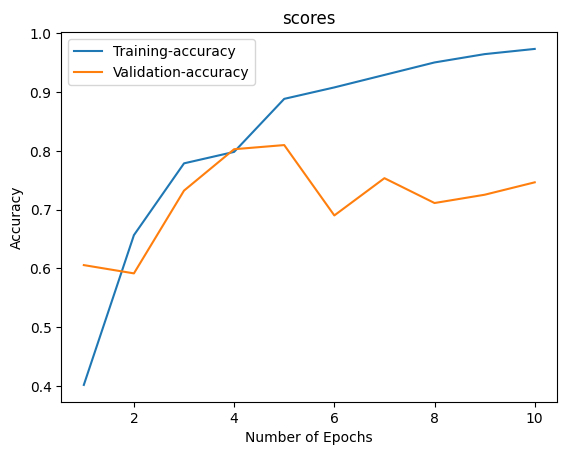

In [21]:
history = model.fit(
        training_generator,
        steps_per_epoch=len(training_generator),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator)
    )
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(train) + 1)
plt.plot(epochs, train , label='Training-accuracy')
plt.plot(epochs, val, label='Validation-accuracy')
plt.title("scores")

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

filter size 7

In [22]:
model = Sequential()

model.add(Conv2D(8, (7, 7), activation='relu', input_shape=(128, 128, 3)))

# Add max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the tensor
model.add(Flatten())

# Add hidden layer with 16 nodes
model.add(Dense(16, activation='relu'))

# Add output layer with 4 nodes and softmax activation
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 122, 122, 8)       1184      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 29768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                476304    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 477,556
Trainable params: 477,556
Non-trainable params: 0
_________________________________________________________________


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 36 steps, validate for 9 steps
Epoch 1/10
36/36 [==============================] - 4s 99ms/step - loss: 1.3588 - accuracy: 0.3150 - val_loss: 1.1362 - val_accuracy: 0.4296
Epoch 2/10
36/36 [==============================] - 3s 79ms/step - loss: 0.9637 - accuracy: 0.5770 - val_loss: 0.9908 - val_accuracy: 0.6127
Epoch 3/10
36/36 [==============================] - 3s 86ms/step - loss: 0.8374 - accuracy: 0.6248 - val_loss: 0.9942 - val_accuracy: 0.6268
Epoch 4/10
36/36 [==============================] - 3s 89ms/step - loss: 0.7356 - accuracy: 0.7221 - val_loss: 0.7499 - val_accuracy: 0.6690
Epoch 5/10
36/36 [==============================] - 3s 90ms/step - loss: 0.5992 - accuracy: 0.7558 - val_loss: 0.6252 - val_accuracy: 0.7746
Epoch 6/10
36/36 [==============================] - 3s 83ms/step - loss: 0.4797 - accuracy: 0.8088 - val_loss: 0.6596 - val_accuracy: 0.7465
Epoch 7/10
36/36 [==============================] - 3s 88ms/ste

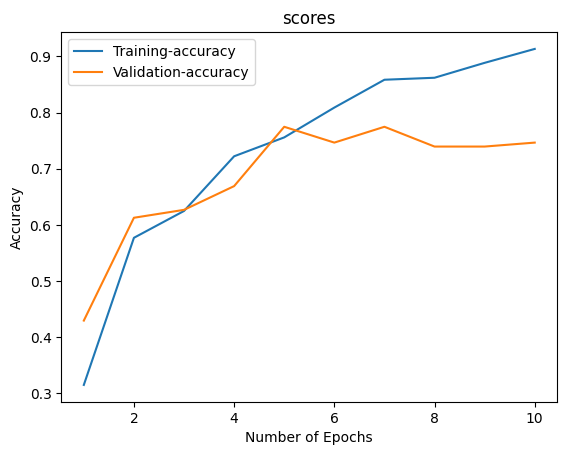

In [23]:
history = model.fit(
        training_generator,
        steps_per_epoch=len(training_generator),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator)
    )
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(train) + 1)
plt.plot(epochs, train , label='Training-accuracy')
plt.plot(epochs, val, label='Validation-accuracy')
plt.title("scores")

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

comparing to model 1 model 3 performs good model 2 is overfitting